# Logistic Regression
Importing Library

In [76]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
tit_data = pd.read_csv("E:\\MCA\\ML\\ML Assignment\\titanic.csv")

In [5]:
tit_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
tit_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
tit_data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
tit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [9]:
tit_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
tit_data.shape

(891, 12)

<AxesSubplot:xlabel='Survived', ylabel='count'>

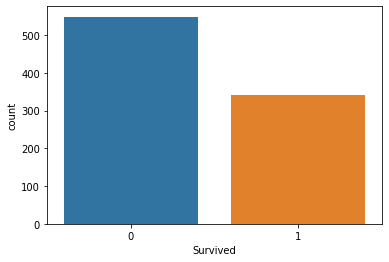

In [11]:
#Analyzing data
sns.countplot(x="Survived",data=tit_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

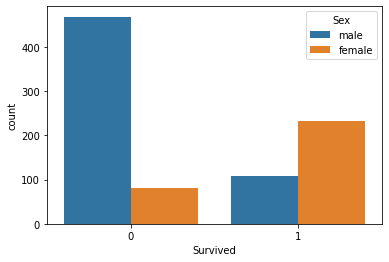

In [13]:
sns.countplot(x="Survived",hue="Sex",data=tit_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

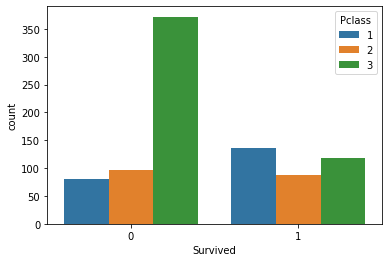

In [14]:
sns.countplot(x="Survived",hue="Pclass",data=tit_data)

<AxesSubplot:ylabel='Frequency'>

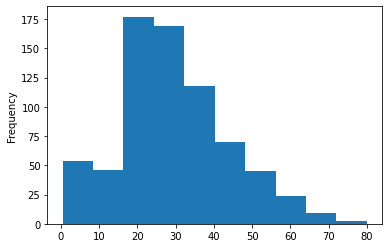

In [15]:
tit_data["Age"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

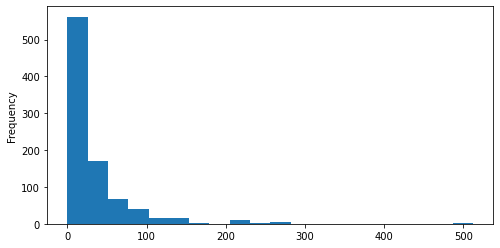

In [23]:
tit_data["Fare"].plot.hist(bins=20, figsize=(8,4)) #bins for range

<AxesSubplot:xlabel='SibSp', ylabel='count'>

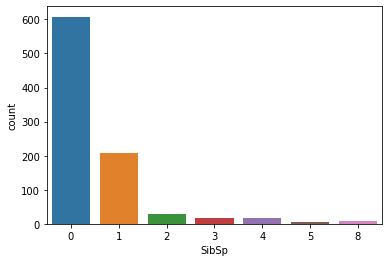

In [24]:
sns.countplot(x="SibSp",data=tit_data) #SibSp means how much person travel together 

<AxesSubplot:xlabel='Parch', ylabel='count'>

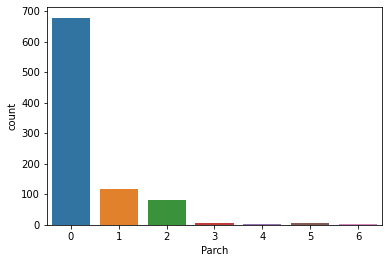

In [26]:
sns.countplot(x="Parch",data=tit_data) #No. of parent and children

In [27]:
#Cleaning the data by removing NaN values or, unneccessary columns
#tit_data.isnull()

In [28]:
tit_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

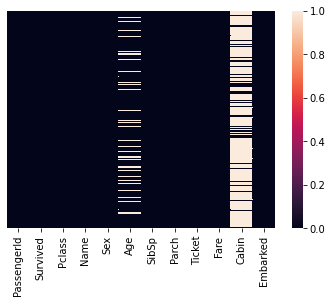

In [29]:
sns.heatmap(tit_data.isnull(),yticklabels=False)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

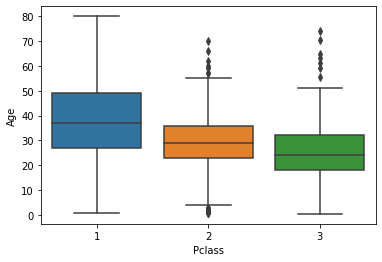

In [30]:
sns.boxplot(x="Pclass",y="Age",data=tit_data)

In [36]:
tit_data.drop(["Cabin"],axis=1).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [38]:
tit_data.drop("Cabin", axis=1, inplace=True)

In [39]:
tit_data.dropna(inplace=True)

<AxesSubplot:>

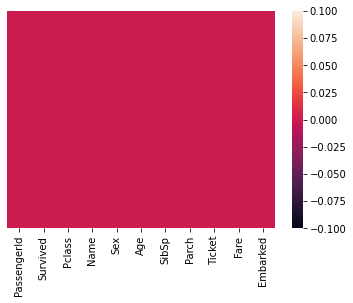

In [41]:
sns.heatmap(tit_data.isnull(),yticklabels=False) #dropna means drop not a number means Age column because of missing values

In [42]:
tit_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [45]:
pd.get_dummies(tit_data["Sex"]) #get_dummies is for labelling Sex columns

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


In [48]:
gender = pd.get_dummies(tit_data["Sex"],drop_first=True)
gender

,male
0,1
1,0
2,0
3,0
4,1
...,...
885,0
886,1
887,0
889,1


In [49]:
gender.head()

,male
0,1
1,0
2,0
3,0
4,1


In [52]:
embark = pd.get_dummies(tit_data["Embarked"])
embark.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [51]:
embark = pd.get_dummies(tit_data["Embarked"],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [53]:
pcl = pd.get_dummies(tit_data["Pclass"])
pcl.head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [54]:
pcl = pd.get_dummies(tit_data["Pclass"],drop_first=True)
pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [56]:
tit_data.drop(["Sex","Embarked","PassengerId","Pclass","Name","Ticket"],axis=1,inplace=True)

In [57]:
tit_data.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [59]:
tit_data=pd.concat([tit_data,gender,embark,pcl],axis=1)

In [60]:
tit_data.head()

,Survived,Age,SibSp,Parch,Fare,male,C,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,0,1,0,1
1,1,38.0,1,0,71.2833,0,1,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,0,1,0,1


In [61]:
#Train Data
x=tit_data.drop("Survived",axis=1)
y=tit_data["Survived"]

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33)

In [69]:
x_train

,Age,SibSp,Parch,Fare,male,C,Q,S,2,3
397,46.0,0,0,26.0000,1,0,0,1,1,0
194,44.0,0,0,27.7208,0,1,0,0,0,0
292,36.0,0,0,12.8750,1,1,0,0,1,0
265,36.0,0,0,10.5000,1,0,0,1,1,0
719,33.0,0,0,7.7750,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
202,34.0,0,0,6.4958,1,0,0,1,0,1
141,22.0,0,0,7.7500,0,0,0,1,0,1
500,17.0,0,0,8.6625,1,0,0,1,0,1
880,25.0,0,1,26.0000,0,0,0,1,1,0


In [70]:
len(x_train)

477

In [71]:
len(x_test)

235

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
logmodel = LogisticRegression()

In [77]:
logmodel.fit(x_train, y_train)

LogisticRegression()

In [78]:
x_test

,Age,SibSp,Parch,Fare,male,C,Q,S,2,3
155,51.0,0,1,61.3792,1,1,0,0,0,0
385,18.0,0,0,73.5000,1,0,0,1,1,0
170,61.0,0,0,33.5000,1,0,0,1,0,0
222,51.0,0,0,8.0500,1,0,0,1,0,1
551,27.0,0,0,26.0000,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
197,42.0,0,1,8.4042,1,0,0,1,0,1
24,8.0,3,1,21.0750,0,0,0,1,0,1
372,19.0,0,0,8.0500,1,0,0,1,0,1
720,6.0,0,1,33.0000,0,0,0,1,1,0


In [80]:
logmodel.intercept_

array([2.22625355])

In [81]:
logmodel.predict_proba(x_test)

array([[0.68411359, 0.31588641],
       [0.56201629, 0.43798371],
       [0.76540542, 0.23459458],
       [0.9294886 , 0.0705114 ],
       [0.69312115, 0.30687885],
       [0.20316063, 0.79683937],
       [0.97246104, 0.02753896],
       [0.54395961, 0.45604039],
       [0.11830122, 0.88169878],
       [0.87356165, 0.12643835],
       [0.9149967 , 0.0850033 ],
       [0.71974267, 0.28025733],
       [0.88358839, 0.11641161],
       [0.35554794, 0.64445206],
       [0.84638374, 0.15361626],
       [0.0362771 , 0.9637229 ],
       [0.71057785, 0.28942215],
       [0.831504  , 0.168496  ],
       [0.70162835, 0.29837165],
       [0.03093094, 0.96906906],
       [0.83739063, 0.16260937],
       [0.89476573, 0.10523427],
       [0.83145466, 0.16854534],
       [0.69852796, 0.30147204],
       [0.15657271, 0.84342729],
       [0.86827142, 0.13172858],
       [0.40051396, 0.59948604],
       [0.45351382, 0.54648618],
       [0.88183963, 0.11816037],
       [0.9296147 , 0.0703853 ],
       [0.

In [82]:
x_test

,Age,SibSp,Parch,Fare,male,C,Q,S,2,3
155,51.0,0,1,61.3792,1,1,0,0,0,0
385,18.0,0,0,73.5000,1,0,0,1,1,0
170,61.0,0,0,33.5000,1,0,0,1,0,0
222,51.0,0,0,8.0500,1,0,0,1,0,1
551,27.0,0,0,26.0000,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
197,42.0,0,1,8.4042,1,0,0,1,0,1
24,8.0,3,1,21.0750,0,0,0,1,0,1
372,19.0,0,0,8.0500,1,0,0,1,0,1
720,6.0,0,1,33.0000,0,0,0,1,1,0


In [86]:
logmodel.predict([[24.0,0,0,69.3000,0,0,0,0,0,0]])

array([1], dtype=int64)

In [87]:
logmodel.score(x_train, y_train)

0.80083857442348